# GRIP - The Spark Foundations


Task 2 - Prediction of optimum no. of clusters from given Iris dataset using Unsupervised ML

By - Ujjwal Saxena


# K-Means Clustering

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups. K-Means is a very common unsupervised algorithm for clustering.


In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
#Loading the iris dataset
iris=datasets.load_iris()


In [3]:
#Converting into dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding optimum no. of clusters



In [4]:
x=df.iloc[:,[0,1,2,3]].values

In [5]:
wcss=[] #Within clusters sum of square

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


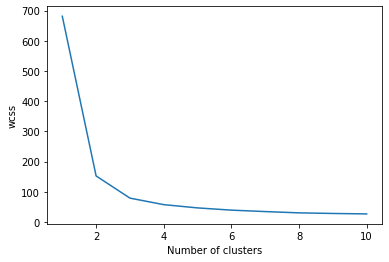

In [6]:
#Ploting the result
plt.plot(range(1,11),wcss)
plt.title=("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [7]:
#Creating the K-means classifier
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
ymeans=kmeans.fit_predict(x)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


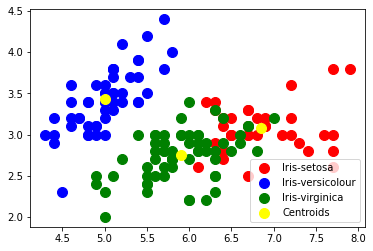

In [8]:
#Visualizing the clusters
plt.scatter(x[ymeans == 0,0], x[ymeans == 0,1], s=100, c='red', label='Iris-setosa')

plt.scatter(x[ymeans == 1,0], x[ymeans == 1,1], s=100, c='blue', label='Iris-versicolour')

plt.scatter(x[ymeans == 2,0], x[ymeans == 2,1], s=100, c='green', label='Iris-virginica')

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='yellow',label='Centroids')

plt.legend()
print(kmeans.cluster_centers_)


# Conclusion

This task has been performed sucessfully.